# EDA and Data Visualization on Netflix dataset

In this notebook we perform some EDA and data visualization on the Netflix dataset obtained from kaggle:
https://www.kaggle.com/shivamb/netflix-shows

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## 0. Import basic libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported!!")

Libraries imported!!


----------------------------------------------------------------------------------------
## 1. Load and read the dataset

Here, we read the dataset and we find the shape of it as well as the colum names.

In [2]:
df = pd.read_csv('netflix_data_cleaned.csv')
df

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,August,2020
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,December,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,December,2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,November,2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,s7781,Movie,Zoo,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,1,July,2018
6639,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,January,2020
6640,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,October,2020
6641,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,March,2019


----------------------------------------------------------------------------------------
## 2. Analyse content type of netflix

Here, we analyse the distribution of the content types (TV Show and Movie) of netflix.

First, we will count how many rows of each category are.

In [3]:
df['type'].value_counts()

Movie      4761
TV Show    1882
Name: type, dtype: int64

Then, we will plot some graphs to visualize this values.

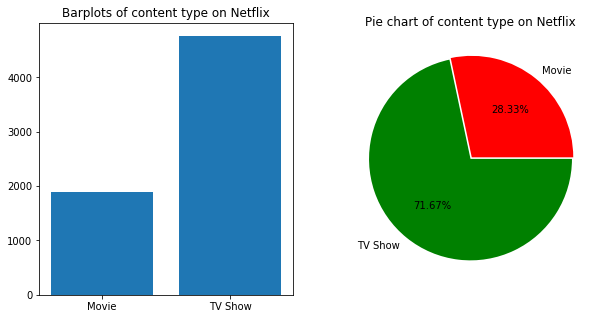

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#create a barplot
axs[0].bar(df['type'].value_counts().index,df['type'].value_counts().sort_values())
axs[0].set_title('Barplots of content type on Netflix')
#create a pieplot
axs[1].pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.02,0],
        autopct='%1.2f%%',colors=['Red','Green'])
axs[1].set_title('Pie chart of content type on Netflix')
plt.show()

From these charts we can conclude that there are more TV Shows in Netflix than movies.

**71.67%** of the content of Netflix are **TV Shows**, while the **28.33%** are **Movies**.

----------------------------------------------------------------------------------------
## 3. Analyse genres of the netflix content

Here, we analyse the genres of the content of netflix.

First, we will see how many genres are in Netlix dataset.

In [5]:
#convert the genres of each row to a list
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
#get the genres of netflix content
genres = []
for i in df['genre']: genres += i
genres = sorted(list(set(genres)))
print('In total there are', len(genres), 'genres:')
for g in genres :
    print('-', g)

In total there are 42 genres:
- Action & Adventure
- Anime Features
- Anime Series
- British TV Shows
- Children & Family Movies
- Classic & Cult TV
- Classic Movies
- Comedies
- Crime TV Shows
- Cult Movies
- Documentaries
- Docuseries
- Dramas
- Faith & Spirituality
- Horror Movies
- Independent Movies
- International Movies
- International TV Shows
- Kids' TV
- Korean TV Shows
- LGBTQ Movies
- Movies
- Music & Musicals
- Reality TV
- Romantic Movies
- Romantic TV Shows
- Sci-Fi & Fantasy
- Science & Nature TV
- Spanish-Language TV Shows
- Sports Movies
- Stand-Up Comedy
- Stand-Up Comedy & Talk Shows
- TV Action & Adventure
- TV Comedies
- TV Dramas
- TV Horror
- TV Mysteries
- TV Sci-Fi & Fantasy
- TV Shows
- TV Thrillers
- Teen TV Shows
- Thrillers


Now, let's create a dataframe with the genres of each content.

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer 

mlb = MultiLabelBinarizer()

genres_df2 = pd.DataFrame(mlb.fit_transform(df['genre']), columns=mlb.classes_, index=df['genre'].index)

genres_df1 = pd.DataFrame(data=df[['show_id','type','title']])

genres_df = pd.concat([genres_df1, genres_df2], axis=1)

genres_df.head()

,show_id,type,title,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,TV Show,3%,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,s2,Movie,7:19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's see how much content of each genre is in the netflix catalogue.

In [7]:
genres_count = genres_df[genres].sum().sort_values(ascending=False)
genres_count

International Movies            2200
Dramas                          2053
Comedies                        1423
International TV Shows           969
Action & Adventure               700
Independent Movies               668
TV Dramas                        618
Romantic Movies                  516
Thrillers                        479
Children & Family Movies         466
TV Comedies                      449
Documentaries                    387
Crime TV Shows                   339
Kids' TV                         317
Horror Movies                    304
Stand-Up Comedy                  299
Romantic TV Shows                278
Music & Musicals                 270
Sci-Fi & Fantasy                 214
British TV Shows                 184
Docuseries                       158
Sports Movies                    148
TV Action & Adventure            139
Anime Series                     134
Korean TV Shows                  132
Reality TV                       132
Spanish-Language TV Shows        128
C

Now let's see the correlations between the genres.

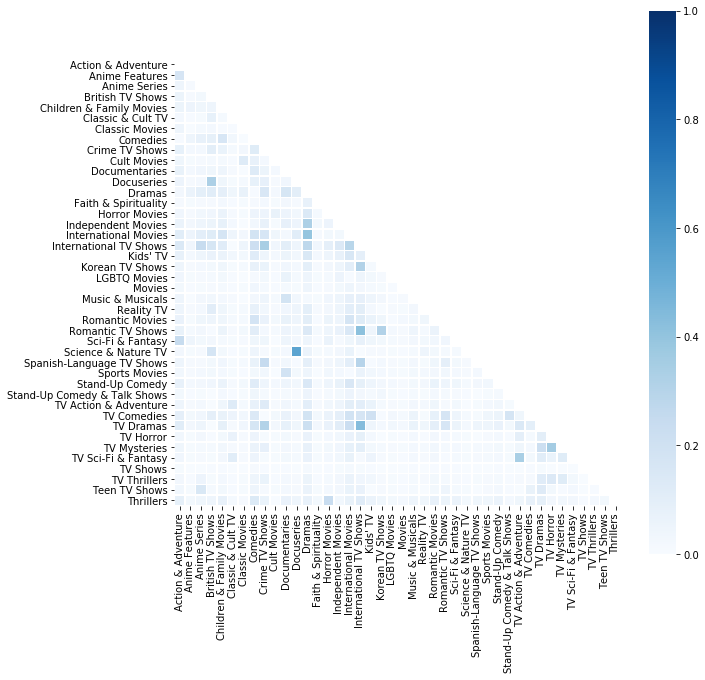

In [8]:
cors = abs(genres_df.corr(method='pearson'))
mask = np.zeros_like(cors, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(10,10))
sns.heatmap(cors, mask=mask, cmap= "Blues", vmax=1, vmin=0, square=True, linewidths=.5)
plt.show()

From this plot we can see that all the genres are correlated between them with correlation values higher than 0.5.

Now let's save the created dataset with the genres of the movies and series for a further recommendation system development.

In [9]:
genres_df.to_csv('netflix_data_genres.csv')